<ipython-input-3-96c929f12adb>:61: RuntimeWarning: invalid value encountered in log10
  img = 10**((23.9-zp)/2.5+np.log10(img.data))


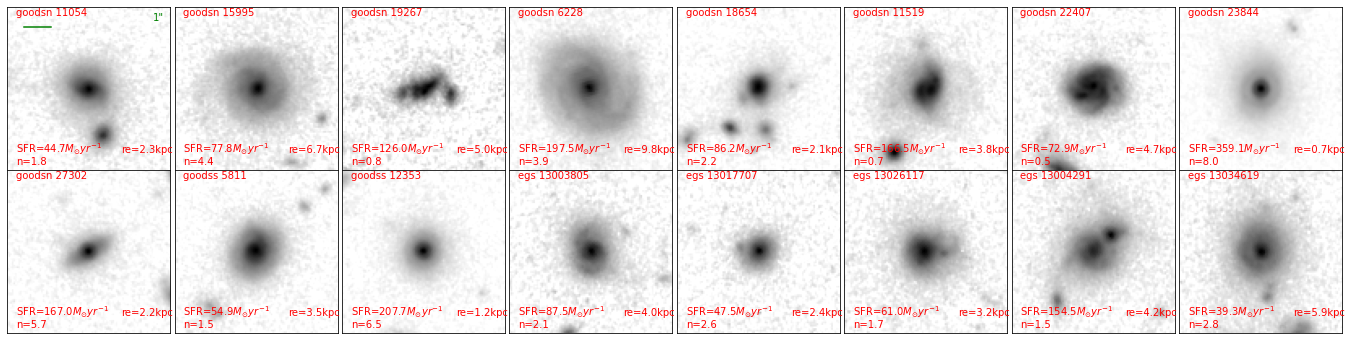

In [3]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM as flcdm
from IPython.display import clear_output

sed_class = ['AGN','Composite','SFG','Quiescent','Blue compact']
path = '/Users/lpr/Data/lirg_project/output/'
expath = '/Users/lpr/Data/lirg_project/output/RGB_stamp_images/'
catalog_path = path + 'catalog_radec/'
catalog_suffix = '_Huangall_candels_van_params_zmasshuangsfr.fits'
id_suffix = '_id.fits'
ginim20_ctg_suffix = '_GiniM20_10arcseccutout.fits'
re_ctg_path = '/Users/lpr/Data/lirg_project/output/van_re_half_light_radius/'

ulirg = {'goodsn': np.array([15995, 11054, 19267,  6228, 18654, 11519, 22407, 23844, 27302]),
 'goodss': np.array([ 5811, 12353]),
 'egs': np.array([13003805, 13017707, 13026117, 13004291, 13034619])}

def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)

field_list = ['goodsn','goodss','egs']
a = 500 # logrithm parameter
radius = 1 # unit "
pixel_scale = 0.06
    
count = 0 #用来计数画了多少个星系了
page = -1 #用来判断是否该另起一页了
for num1 in [0,1,2]:
    id_list = fits.getdata(catalog_path+field_list[num1]+id_suffix,1)
    id_list = id_list[np.isin(id_list['id'], ulirg[field_list[num1]])]
    catalog = fits.open(catalog_path+field_list[num1]+catalog_suffix)[1].data
    catalog[num1]['re_f160w'] = catalog[num1]['re_f160w']*kpc_per_arcsec(catalog[num1]['z_used'])
    re_ctg = fits.getdata(re_ctg_path+field_list[num1]+'_re_hlr.fits',1)
    for num2 in range(0,len(id_list)):
        p = int(count/96) #判断当前的星系应该放在哪一页上
        r = int((count-p*96)/8) #判断当前星系应该在第几行
        c = (count-p*96)-r*8
        if p>page:
            fig_size = [3*8,3*12]
            fig = plt.figure(figsize=fig_size)
            gs = fig.add_gridspec(12,8,wspace=0,hspace=0)
            page = p
        idx = id_list[num2]['id']
        if re_ctg[re_ctg['id']==idx]['n_f160w'] != -99.:
            n = re_ctg[re_ctg['id']==idx]['n_f160w'][0]
        else:
            n = catalog[catalog['id']==idx]['n_f160w'][0]
        mass = catalog[catalog['id']==idx]['lmass_candels'][0]
        z = catalog[catalog['id']==idx]['z_used'][0]
        f = catalog[catalog['id']==idx]['f_f160w'][0]
        re = re_ctg[re_ctg['id']==idx]['re'][0]*kpc_per_arcsec(z)
        sfr = catalog[catalog['id']==idx]['sfr_huang'][0]
        tmp_class = catalog[catalog['id']==idx]['tmp_class'][0][0]
        img = fits.open(catalog_path+field_list[num1]+'/'+field_list[num1]+'_f160w/'+field_list[num1]+'_f160w_'+str(idx)+'.fits')[0]
        zp = -2.5*np.log10(img.header['PHOTFLAM']) - 21.10 - 5*np.log10(img.header['PHOTPLAM']) + 18.6921
        img = 10**((23.9-zp)/2.5+np.log10(img.data))
        img = np.log10(a*img+1)/np.log10(a)
        img[np.isnan(img)] = 0
        ax = fig.add_subplot(gs[r,c])
        ax.imshow(img,cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        if count in [0,96,192,288,384]:
            ax.plot([10,10+radius/pixel_scale],[12,12],color='green')
            ax.text(90,8,'1"',color='green',fontsize=10)
        ax.text(5,5,field_list[num1]+' '+str(idx),color='red',fontsize=10)
#         ax.text(5,15,r'$log_{10}(M_*/M_{\odot})=$'+str(round(mass,1)),color='red',fontsize=10)
#         ax.text(5,15,str(f),color='red',fontsize=10)
        ax.text(5,15+75,'SFR='+str(round(sfr,1))+r'$M_{\odot}yr^{-1}$',color='red',fontsize=10)
        ax.text(5,22+75,'n='+str(round(n,1)),color='red',fontsize=10)
        ax.text(70,15+75,'re='+str(round(re,1))+'kpc',color='red',fontsize=10)
#         ax.text(70,22+75,sed_class[int(tmp_class)-1],color='red',fontsize=10)
        # if count == (page+1)*96-1 or count == 478:
        #     plt.savefig('/Users/lpr/Data/lirg_project/output/RGB_stamp_images/all_'+str(page)+'_radec_del.pdf')
        count += 1
plt.savefig('/Users/lpr/Data/lirg_project/output/images/ULIRGs_stamps.png')

In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM as flcdm
def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)
from astropy.io import fits
import numpy as np
from astropy.visualization import make_lupton_rgb
hdu1 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodsn_Huangall_candels_radec_van_sfr.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/goodss_Huangall_candels_radec_van_sfr.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/lirg_project/output/catalog/egs_Huangall_candels_radec_van_sfr.fits')[1].data
# # Huang(2021) selected galaxies with 0.8<z<1.3
hdu1 = hdu1[np.where((hdu1['Separation_CANDELS_16']<1)&(hdu1['z_used']>=0.8)&(hdu1['z_used']<=1.3)&(hdu1['f_f160w']!=2))]
hdu2 = hdu2[np.where((hdu2['Separation_CANDELS_16']<1)&(hdu2['z_used']>=0.8)&(hdu2['z_used']<=1.3)&(hdu2['f_f160w']!=2))]
hdu3 = hdu3[np.where((hdu3['Separation_CANDELS_16']<1)&(hdu3['z_used']>=0.8)&(hdu3['z_used']<=1.3)&(hdu3['f_f160w']!=2)&(hdu3['ID']!=-1))]#&(hdu3['MASS']>1))]
for num1 in range(0,len(hdu1)):
    hdu1[num1]['re_f160w'] = hdu1[num1]['re_f160w']*kpc_per_arcsec(hdu1[num1]['z_used'])
for num2 in range(0,len(hdu2)):
    hdu2[num2]['re_f160w'] = hdu2[num2]['re_f160w']*kpc_per_arcsec(hdu2[num2]['z_used'])
for num3 in range(0,len(hdu3)):
    hdu3[num3]['re_f160w'] = hdu3[num3]['re_f160w']*kpc_per_arcsec(hdu3[num3]['z_used'])

In [46]:
agn1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 1)]
agn2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 1)]
agn3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 1)]
composite1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 2)]
composite2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 2)]
composite3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 2)]
sf1 = hdu1[np.where(hdu1['TMP_CLASS'][:,0] == 3)]
sf2 = hdu2[np.where(hdu2['TMP_CLASS'][:,0] == 3)]
sf3 = hdu3[np.where(hdu3['TMP_CLASS'][:,0] == 3)]
agn_1 = hdu1[np.where(hdu1['L4P5EX']>10**9.5)]
agn_2 = hdu2[np.where(hdu2['L4P5EX']>10**9.5)]
agn_3 = hdu3[np.where(hdu3['L4P5EX']>10**9.5)]
# ---------------------------------------------------------------------------------------------------------------
agn_n = np.concatenate((agn1['n_f160w'],agn2['n_f160w'],agn3['n_f160w']),axis=0)
composite_n = np.concatenate((composite1['n_f160w'],composite2['n_f160w'],composite3['n_f160w']),axis=0)
sf_n = np.concatenate((sf1['n_f160w'],sf2['n_f160w'],sf3['n_f160w']),axis=0)
agn_l4p5_n = np.concatenate((agn_1['n_f160w'],agn_2['n_f160w'],agn_3['n_f160w']),axis=0)

In [68]:
print(np.sort(agn_n))
print(np.median(agn_n[np.where((agn_n>=2)&(agn_n!=8))]))
print(np.median(agn_n[np.where((agn_n<2)&(agn_n>=0))]))
print(np.sort(composite_n))
print(np.median(composite_n[np.where((composite_n>=2.)&(composite_n!=8))]))
print(np.median(composite_n[np.where((composite_n<2)&(composite_n>=0))]))
print(np.sort(sf_n))
print(np.median(sf_n[np.where((sf_n>=2.)&(sf_n!=8))]))
print(np.median(sf_n[np.where((sf_n<2)&(sf_n>=0))]))
print(np.sort(agn_l4p5_n))
print(np.median(agn_l4p5_n[np.where((agn_l4p5_n>=2.)&(agn_l4p5_n!=8))]))
print(np.median(agn_l4p5_n[np.where((agn_l4p5_n<2)&(agn_l4p5_n>=0))]))
# ---------------------------------------------------------------------------------------------------------------
print(agn1[np.where((agn1['n_f160w']==1.0839))]['ID'])
print(agn2[np.where((agn2['n_f160w']==1.0839))]['ID'])
print(agn3[np.where((agn3['n_f160w']==1.0839))]['ID'])
print(composite1[np.where((composite1['n_f160w']==2.4305))]['ID'])
print(composite2[np.where((composite2['n_f160w']==2.4305))]['ID'])
print(composite3[np.where((composite3['n_f160w']==2.4305))]['ID'])
print(sf1[np.where((sf1['n_f160w']==2.8983))]['ID'])
print(sf2[np.where((sf2['n_f160w']==2.8983))]['ID'])
print(sf3[np.where((sf3['n_f160w']==2.8983))]['ID'])
print(agn_1[np.where((agn_1['n_f160w']==3.2609))]['ID'])
print(agn_2[np.where((agn_2['n_f160w']==3.2609))]['ID'])
print(agn_3[np.where((agn_3['n_f160w']==3.2609))]['ID'])

[0.2766 0.321  0.3233 0.3392 0.4929 0.6582 0.6631 0.6936 0.7162 0.722
 0.7283 0.8063 0.8304 0.8413 0.9167 0.987  1.0491 1.0611 1.0839 1.176
 1.1975 1.2154 1.2187 1.2707 1.2734 1.3753 1.3914 1.4034 1.4573 1.4592
 1.6686 1.6707 1.7174 1.7291 1.9156 1.9194 2.1047 2.2251 2.3395 2.5188
 2.5465 2.5708 2.5731 2.5876 2.5991 3.1997 3.2484 4.2653 4.4182 4.9032
 5.015  5.6666 6.5252 7.2751]
2.8994002
1.0725
[-9.9900e+02  3.7820e-01  3.9270e-01  4.1310e-01  4.5200e-01  4.9060e-01
  4.9310e-01  4.9700e-01  5.1300e-01  5.3740e-01  5.7700e-01  6.0060e-01
  6.0620e-01  6.2220e-01  6.3770e-01  6.4290e-01  6.6080e-01  6.7050e-01
  6.7540e-01  6.8860e-01  6.9280e-01  6.9740e-01  7.1430e-01  7.1920e-01
  7.2170e-01  7.2800e-01  7.4430e-01  7.4890e-01  7.5180e-01  7.6440e-01
  7.7550e-01  7.8680e-01  7.9500e-01  7.9550e-01  8.1030e-01  8.1250e-01
  8.4100e-01  8.4720e-01  8.5120e-01  8.5130e-01  8.6640e-01  8.6830e-01
  8.9270e-01  8.9480e-01  8.9730e-01  9.0440e-01  9.1780e-01  9.1840e-01
  9.2500e-01  9.

In [2]:
# sort images as sersic index and stellar mass and sed class(agn composite star-forming galaxies)
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
path = '/Users/lpr/Data/lirg_project/output/'
expath = '/Users/lpr/Data/lirg_project/output/RGB_stamp_images/'
catalog_path = path + 'catalog/'
catalog_suffix = '_Huangall_candels_radec_van_zmass.fits'
field_list = ['goodsn','goodss','egs']
a = 500 # logrithm parameter
radius = 1 # unit "
pixel_scale = 0.06
sed_class = ['AGN','Composite','Star forming','Quiescent','Blue compact']

In [3]:
def rescale(arr):
    arr_min = np.nanmin(arr)
    arr_max = np.nanmax(arr)
    return (arr - arr_min) / (arr_max - arr_min)

In [ ]:
import os
from astropy.visualization import make_lupton_rgb
path = '/Users/lpr/Data/lirg_project/output/'
expath = '/Users/lpr/Data/lirg_project/output/RGB_stamp_images/'
# catalog_path = path + 'catalog/'
# catalog_suffix = '_Huangall_radec_candels.fits'
fields_list = ['goodsn','goodss','egs']
idx_list = {'11':['goodsn','9668'],'12':['goodsn','14593'],'13':['goodsn','1702'],'21':['goodsn','17448'],'22':['goodsn','20429'],'23':['goodss','7810']}

radius = 1 # unit "
pixel_scale = 0.06
fig_size = [21,11]
fig = plt.figure(figsize=fig_size)
gs = fig.add_gridspec(3-1,4-1,width_ratios=(1,1,1),height_ratios=(1,1),wspace=fig_size[0]/1000, hspace=fig_size[1]/1000) # ,left=0.1,right=0.9,bottom=0.1,top=0.9
for num1 in [1,2]:
    for num2 in [1,2,3]:
        img_r = rescale(fits.open(path+idx_list[str(num1)+str(num2)][0]+'/'+idx_list[str(num1)+str(num2)][0]+'_f160w/'+idx_list[str(num1)+str(num2)][0]+'_f160w_'+idx_list[str(num1)+str(num2)][1]+'.fits')[0].data)
        img_g = rescale(fits.open(path+idx_list[str(num1)+str(num2)][0]+'/'+idx_list[str(num1)+str(num2)][0]+'_f125w/'+idx_list[str(num1)+str(num2)][0]+'_f125w_'+idx_list[str(num1)+str(num2)][1]+'_photutils.fits')[0].data)
        img_b = rescale(fits.open(path+idx_list[str(num1)+str(num2)][0]+'/'+idx_list[str(num1)+str(num2)][0]+'_f606w/'+idx_list[str(num1)+str(num2)][0]+'_f606w_'+idx_list[str(num1)+str(num2)][1]+'_photutils.fits')[0].data)
        image = make_lupton_rgb(img_r,img_g,img_b,stretch=1,Q=0.5)
        ax = fig.add_subplot(gs[num1-1,num2-1])
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.plot([10,10+radius/pixel_scale],[10,10],color='green')
        ax.text(16,8,'1"',color='green',fontsize=20)
        if num1==1 and num2 ==1:
            ax.set_title(r'AGN($L_{4.5}^{EX}$)',fontsize=20)
            ax.set_ylabel('0<n<2',fontsize=20)
        elif num1==1 and num2==2:
            ax.set_title('Composite',fontsize=20)
        elif num1==1 and num2==3:
            ax.set_title('Star-forming',fontsize=20)
        elif num1==2 and num2==1:
            ax.set_ylabel(r'2$\leq$n<8',fontsize=20)

In [ ]:
import os
from astropy.visualization import make_lupton_rgb
path = '/Users/lpr/Data/lirg_project/output/'
expath = '/Users/lpr/Data/lirg_project/output/RGB_stamp_images/'
catalog_path = path + 'catalog/'
catalog_suffix = '_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits'
fields_list = ['goodsn','goodss','egs']
# idx_list = {'11':['goodsn','17020'],'12':['goodss','10673'],'13':['goodsn','14057'],'21':['goodsn','1323'],'22':['goodsn','20429'],'23':['goodss','11284']} #AGN(SED), choose right side of n(median)
# idx_list = {'11':['goodsn','1308'],'12':['goodss','14593'],'13':['goodsn','1702'],'21':['egs','13017707'],'22':['goodsn','20429'],'23':['goodss','11284']} #AGN(SED), choose left side of n(median)
idx_list = {'11':['goodsn','34537'],'12':['goodsn','16369'],'13':['goodsn','26495'],'21':['goodsn','2929'],'22':['goodsn','11631'],'23':['goodsn','33322']} #AGN(L4.5), choose right side of n(median)
# idx_list = {'11':['goodsn','10685'],'12':['goodsn','14593'],'13':['goodsn','1702'],'21':['goodsn','17448'],'22':['goodsn','20429'],'23':['goodss','11284']} #AGN(L4.5), choose left side of n(median)
a = 500 # logrithm parameter
radius = 1 # unit "
pixel_scale = 0.06
fig_size = [16,11]
fig = plt.figure(figsize=fig_size)
gs = fig.add_gridspec(3-1,4-1,width_ratios=(1,1,1),height_ratios=(1,1),wspace=fig_size[0]/1000, hspace=fig_size[1]/1000) # ,left=0.1,right=0.9,bottom=0.1,top=0.9
for num1 in [1,2]:
    for num2 in [1,2,3]:
        catalog = fits.open(catalog_path+idx_list[str(num1)+str(num2)][0]+catalog_suffix)[1].data
        mass = catalog[np.where(catalog['ID']==int(idx_list[str(num1)+str(num2)][1]))]['lmass_candels'][0]
        n = catalog[np.where(catalog['ID']==int(idx_list[str(num1)+str(num2)][1]))]['n_f160w'][0]
        img_r = fits.open(path+idx_list[str(num1)+str(num2)][0]+'/'+idx_list[str(num1)+str(num2)][0]+'_f160w/'+idx_list[str(num1)+str(num2)][0]+'_f160w_'+idx_list[str(num1)+str(num2)][1]+'.fits')[0]
        zp = -2.5*np.log10(img_r.header['PHOTFLAM']) - 21.10 - 5*np.log10(img_r.header['PHOTPLAM']) + 18.6921
        img_r = 10**((23.9-zp)/2.5+np.log10(img_r.data))
        img_g = fits.open(path+idx_list[str(num1)+str(num2)][0]+'/'+idx_list[str(num1)+str(num2)][0]+'_f125w/'+idx_list[str(num1)+str(num2)][0]+'_f125w_'+idx_list[str(num1)+str(num2)][1]+'.fits')[0]
        zp = -2.5*np.log10(img_g.header['PHOTFLAM']) - 21.10 - 5*np.log10(img_g.header['PHOTPLAM']) + 18.6921
        img_g = 10**((23.9-zp)/2.5+np.log10(img_g.data))
        img_b = fits.open(path+idx_list[str(num1)+str(num2)][0]+'/'+idx_list[str(num1)+str(num2)][0]+'_f606w/'+idx_list[str(num1)+str(num2)][0]+'_f606w_'+idx_list[str(num1)+str(num2)][1]+'.fits')[0]
        zp = -2.5*np.log10(img_b.header['PHOTFLAM']) - 21.10 - 5*np.log10(img_b.header['PHOTPLAM']) + 18.6921
        img_b = 10**((23.9-zp)/2.5+np.log10(img_b.data))
#         image = make_lupton_rgb(img_r,img_g,img_b,stretch=0.5,Q=0.1)
        img_r = np.log10(a*img_r+1)/np.log10(a)
        img_g = np.log10(a*img_g+1)/np.log10(a)
        img_b = np.log10(a*img_b+1)/np.log10(a)
        img_r = rescale(img_r)
        img_r[np.isnan(img_r)] = 0
        img_g = rescale(img_g)
        img_g[np.isnan(img_g)] = 0
        img_b = rescale(img_b)
        img_b[np.isnan(img_b)] = 0
        image = np.dstack([img_r,img_g,img_b])
        ax = fig.add_subplot(gs[num1-1,num2-1])
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.plot([10,10+radius/pixel_scale],[10,10],color='green')
        ax.text(16,8,'1"',color='green',fontsize=20)
        ax.text(11,15+75,'n='+str(round(n,2)),color='red',fontsize=20)
        ax.text(11,22+75,r'$log_{10}(M_{*}/M_{\odot})=$'+str(round(mass,2)),color='red',fontsize=20)
        if num1==1 and num2 ==1:
            ax.set_title(r'AGN',fontsize=20)
            ax.set_ylabel('0<n<2',fontsize=20)
        elif num1==1 and num2==2:
            ax.set_title('Composite',fontsize=20)
        elif num1==1 and num2==3:
            ax.set_title('Star-forming',fontsize=20)
        elif num1==2 and num2==1:
            ax.set_ylabel(r'2$\leq$n<8',fontsize=20)
plt.savefig(expath+'stamp_image_l4p5_n_median_right.pdf')

In [ ]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM as flcdm
from IPython.display import clear_output
from matplotlib.patches import Rectangle

sed_class = ['AGN','Composite','SFG','Quiescent','Blue compact']
path = '/Users/lpr/Data/lirg_project/output/'
expath = '/Users/lpr/Data/lirg_project/output/RGB_stamp_images/'
catalog_path = path + 'catalog_radec/'
catalog_suffix = '_Huangall_candels_van_params_zmasshuangsfr.fits'
id_suffix = '_id.fits'
re_ctg_path = '/Users/lpr/Data/lirg_project/output/van_re_half_light_radius/'

def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)

field_list = ['goodsn','goodss','egs']
a = 500 # logrithm parameter
radius = 1 # unit "
pixel_scale = 0.06
broadsources = {'goodsn':23844, 'goodss':12353, 'egs':-99}
count = 0 #用来计数画了多少个星系了
page = -1 #用来判断是否该另起一页了
for num1 in [0,1,2]:
    id_list = fits.getdata(catalog_path+field_list[num1]+id_suffix,1)
    catalog = fits.open(catalog_path+field_list[num1]+catalog_suffix)[1].data
    catalog[num1]['re_f160w'] = catalog[num1]['re_f160w']*kpc_per_arcsec(catalog[num1]['z_used'])
    re_ctg = fits.getdata(re_ctg_path+field_list[num1]+'_re_hlr.fits',1)
    dtype = [('id', int), ('n', float)]
    values = []
    # 先把id和n整理到一起
    for num2 in range(0,len(id_list)):
        idx = id_list[num2]['id']
        if re_ctg[re_ctg['id']==idx]['n_f160w'] != -99.:
            n = re_ctg[re_ctg['id']==idx]['n_f160w'][0]
        else:
            n = catalog[catalog['id']==idx]['n_f160w'][0]
        values.append((idx, n))
    array = np.array(values, dtype=dtype)
    new_array = np.sort(array, order='n')
    for num2 in range(new_array.size):
        p = int(count/96) #判断当前的星系应该放在哪一页上
        r = int((count-p*96)/8) #判断当前星系应该在第几行
        c = (count-p*96)-r*8
        if p>page:
            fig_size = [3*8,3*12]
            fig = plt.figure(figsize=fig_size)
            gs = fig.add_gridspec(12,8,wspace=0,hspace=0)
            page = p
        idx = new_array[num2]['id']
        if re_ctg[re_ctg['id']==idx]['n_f160w'] != -99.:
            n = re_ctg[re_ctg['id']==idx]['n_f160w'][0]
        else:
            n = catalog[catalog['id']==idx]['n_f160w'][0]
        mass = catalog[catalog['id']==idx]['lmass_candels'][0]
        z = catalog[catalog['id']==idx]['z_used'][0]
        f = catalog[catalog['id']==idx]['f_f160w'][0]
        re = re_ctg[re_ctg['id']==idx]['re'][0]*kpc_per_arcsec(z)
        sfr = catalog[catalog['id']==idx]['sfr_huang'][0]
        tmp_class = catalog[catalog['id']==idx]['tmp_class'][0][0]
        img = fits.open(catalog_path+field_list[num1]+'/'+field_list[num1]+'_f160w/'+field_list[num1]+'_f160w_'+str(idx)+'.fits')[0]
        zp = -2.5*np.log10(img.header['PHOTFLAM']) - 21.10 - 5*np.log10(img.header['PHOTPLAM']) + 18.6921
        img = 10**((23.9-zp)/2.5+np.log10(img.data))
        img = np.log10(a*img+1)/np.log10(a)
        img[np.isnan(img)] = 0
        ax = fig.add_subplot(gs[r,c])
        if idx==broadsources[field_list[num1]]:
            ax.imshow(img, cmap='binary')
            rect = Rectangle((0,0), 100, 100, linewidth=5, edgecolor='green', facecolor='none')
            ax.add_patch(rect) 
        else:
            ax.imshow(img,cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
        if count in [0,96,192,288,384]:
            ax.plot([10,10+radius/pixel_scale],[12,12],color='green')
            ax.text(90,8,'1"',color='green',fontsize=10)
        ax.text(5,5,field_list[num1]+' '+str(idx),color='red',fontsize=10)
#         ax.text(5,15,r'$log_{10}(M_*/M_{\odot})=$'+str(round(mass,1)),color='red',fontsize=10)
#         ax.text(5,15,str(f),color='red',fontsize=10)
        ax.text(5,15+75,'SFR='+str(round(sfr,1))+r'$M_{\odot}yr^{-1}$',color='red',fontsize=10)
        ax.text(5,22+75,'n='+str(round(n,1)),color='red',fontsize=10)
        ax.text(70,15+75,'re='+str(round(re,1))+'kpc',color='red',fontsize=10)
#         ax.text(70,22+75,sed_class[int(tmp_class)-1],color='red',fontsize=10)
        if count == (page+1)*96-1 or count == 478:
            plt.savefig(expath+'all_'+str(page)+'_radec_del.pdf')
        count += 1
# for num1 in [0,1,2]:
#     id_list = fits.getdata(catalog_path+field_list[num1]+id_ctg,1)
#     catalog = fits.open(catalog_path+field_list[num1]+catalog_suffix)[1].data
# #     catalog = catalog[np.where((catalog['Separation_candels_huang']<1)&(catalog['z_used']>0.8)&(catalog['z_used']<1.3)&(catalog['ID']!=-1))]
#     catalog[num1]['re_f160w'] = catalog[num1]['re_f160w']*kpc_per_arcsec(catalog[num1]['z_used'])
#     ginim20_ctg = fits.getdata(catalog_path+field_list[num1]+ginim20_ctg_suffix,1)
#     re_ctg = fits.getdata(re_ctg_path+field_list[num1]+'_re_hlr.fits',1)
#     pair_ctg = fits.getdata(catalog_path+field_list[num1]+'_pair_1000kms.fits',1)
#     for num2 in range(0,len(id_list)):
#         p = int(count/96) #判断当前的星系应该放在哪一页上
#         r = int((count-p*96)/8) #判断当前星系应该在第几行
#         c = (count-p*96)-r*8
#         if p>page:
#             fig_size = [3*8,3*12]
#             fig = plt.figure(figsize=fig_size)
#             gs = fig.add_gridspec(12,8,wspace=0,hspace=0)
#             page = p
#         idx = id_list[num2]['id']
#         if re_ctg[re_ctg['id']==idx]['n_f160w'] != -99.:
#             n = re_ctg[re_ctg['id']==idx]['n_f160w'][0]
#         else:
#             n = catalog[catalog['id']==idx]['n_f160w'][0]
#         f = catalog[catalog['id']==idx]['f_f160w'][0]
#         z = catalog[catalog['id']==idx]['z_used'][0]
#         re = re_ctg[re_ctg['id']==idx]['re'][0]*kpc_per_arcsec(z)
#         sfr = catalog[catalog['id']==idx]['sfr_huang'][0]
#         tmp_class = catalog[catalog['id']==idx]['tmp_class'][0][0]
#         if ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']>-0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.33:
#             merger_class = 'merger'
#         elif ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']<-0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.33 and ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']>0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.8:
#             merger_class = 'E/S0/Sa'
#         elif ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']<-0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.33 and ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']<0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.8:
#             merger_class = 'Sb-Ir'
#         if pair_ctg[pair_ctg['id']==idx]['count_spec']>0:
#             pair_flag = 'spec_pair'
#         elif pair_ctg[pair_ctg['id']==idx]['count_phot']>0:
#             pair_flag = 'phot_pair'
#         else:
#             pair_flag = 'not pair'
#         img = fits.open(catalog_path+field_list[num1]+'/'+field_list[num1]+'_f160w/'+field_list[num1]+'_f160w_'+str(idx)+'.fits')[0]
#         zp = -2.5*np.log10(img.header['PHOTFLAM']) - 21.10 - 5*np.log10(img.header['PHOTPLAM']) + 18.6921
#         img = 10**((23.9-zp)/2.5+np.log10(img.data))
#         img = np.log10(a*img+1)/np.log10(a)
#         img[np.isnan(img)] = 0
#         ax = fig.add_subplot(gs[r,c])
#         ax.imshow(img,cmap='binary')
#         ax.set_xticks([])
#         ax.set_yticks([])
#         if count in [0,96,192,288,384]:
#             ax.plot([10,10+radius/pixel_scale],[12,12],color='green')
#             ax.text(90,8,'1"',color='green',fontsize=10)
#         ax.text(5,5,field_list[num1]+' '+str(idx),color='red',fontsize=10)
#         ax.text(5,12,merger_class,color='red')
#         ax.text(70,15,pair_flag,color='green',fontsize=10)
# #         ax.text(5,15,r'$log_{10}(M_*/M_{\odot})=$'+str(round(mass,1)),color='red',fontsize=10)
# #         ax.text(5,15,str(f),color='red',fontsize=10)
#         ax.text(5,15+75,'SFR='+str(round(sfr,1))+r'$M_{\odot}yr^{-1}$',color='red',fontsize=10)
#         ax.text(5,22+75,'n='+str(round(n,1)),color='red',fontsize=10)
#         ax.text(70,15+75,'re='+str(round(re,1))+'kpc',color='red',fontsize=10)
#         ax.text(70,22+75,sed_class[int(tmp_class)-1],color='red',fontsize=10)
#         if count == (page+1)*96-1 or count == 478:
#             plt.savefig('/Users/lpr/Data/lirg_project/output/gini_m20_segmap/all_'+str(page)+'_radec_del.pdf')
#         count += 1

## 形态

In [1]:
from astropy.io import fits
import numpy as np

hdu1 = fits.open('/Users/lpr/Data/lirg_project/output/catalog_radec/goodsn_id.fits')[1].data
hdu2 = fits.open('/Users/lpr/Data/lirg_project/output/catalog_radec/goodss_id.fits')[1].data
hdu3 = fits.open('/Users/lpr/Data/lirg_project/output/catalog_radec/egs_id.fits')[1].data
print(len(hdu1)+len(hdu2)+len(hdu3))

479


In [ ]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM as flcdm
from IPython.display import clear_output
from astropy.wcs import WCS

sed_class = ['AGN','Composite','SFG','Quiescent','Blue compact']
path = '/Users/lpr/Data/lirg_project/output/'
expath = '/Users/lpr/Data/lirg_project/output/RGB_stamp_images/'
catalog_path = path + 'catalog_radec/'
catalog_suffix = '_Huangall_candels_radec_van_zmasssfr8sfrhuangsfr.fits'
id_suffix = '_id.fits'
ginim20_ctg_suffix = '_GiniM20_10arcseccutout.fits'
re_ctg_path = '/Users/lpr/Data/lirg_project/output/van_re_half_light_radius/'

def kpc_per_arcsec(z):
    angular_distance = flcdm(H0=70,Om0=0.3).angular_diameter_distance(z).to_value()
    arc_scale = angular_distance*np.pi*1000/(180*3600)
    return(arc_scale)

field_list = ['goodsn','goodss','egs']
candels_fields = {'goodsn':'gdn','goodss':'gds','egs':'egs'}
morph_flag= {-1:'undefined',1:'spiral/disky',2:'Ir',3:'compact',4:'merger'}
a = 500 # logrithm parameter
radius = 1 # unit "
pixel_scale = 0.06
flag_color = ['red','blue']
count = 0 #用来计数画了多少个星系了
page = -1 #用来判断是否该另起一页了
# 画merger
for num1 in [0,1,2]:
    ginim20_ctg = fits.getdata(catalog_path+field_list[num1]+ginim20_ctg_suffix,1)
#     re_ctg = fits.getdata(re_ctg_path+field_list[num1]+'_re_hlr.fits',1)
    catalog = fits.open(catalog_path+field_list[num1]+catalog_suffix)[1].data
#     pair_ctg = fits.getdata(catalog_path+field_list[num1]+'_pair_1000kms.fits',1)
    idx_ctg = fits.getdata(catalog_path+field_list[num1]+id_suffix,1)
#     c_ctg = fits.getdata('/Users/lpr/Data/lirg_project/intake/CANDELS/catalog/JFang_CANDELS_Data/'+candels_fields[field_list[num1]]+'_all.fits',1)
    morph_ctg = fits.getdata(catalog_path+field_list[num1]+'_morph.fits',1)
    for num2 in range(0,len(morph_ctg)):
        p = int(count/96) #判断当前的星系应该放在哪一页上
        r = int((count-p*96)/8) #判断当前星系应该在第几行
        c = (count-p*96)-r*8
        if p>page:
            fig_size = [3*8,3*12]
            fig = plt.figure(figsize=fig_size)
            gs = fig.add_gridspec(12,8,wspace=0,hspace=0)
            page = p
        idx = morph_ctg[num2]['id']
        if idx in idx_ctg['id']:
#             if re_ctg[re_ctg['id']==idx]['n_f160w'] != -99.:
#                 n = re_ctg[re_ctg['id']==idx]['n_f160w'][0]
#             elif idx!=-99:
#                 n = catalog[catalog['id']==idx]['n_f160w'][0]
#             f = catalog[catalog['id']==idx]['f_f160w'][0]
#             z = catalog[catalog['id']==idx]['z_used'][0]
#             re = re_ctg[re_ctg['id']==idx]['re'][0]*kpc_per_arcsec(z)
#             sfr = catalog[catalog['id']==idx]['sfr_huang'][0]
#             tmp_class = catalog[catalog['id']==idx]['tmp_class'][0][0]
#             if pair_ctg[pair_ctg['id']==idx]['count_spec']>0:
#                 pair_flag = 'spec_pair'
#             elif pair_ctg[pair_ctg['id']==idx]['count_phot']>0:
#                 pair_flag = 'phot_pair'
#             else:
#                 pair_flag = 'not pair'
#             pair_id_list = pair_ctg['com_id_can'][pair_ctg['id']==idx][0]
#             pair_z_flag = pair_ctg['com_z_flag'][pair_ctg['id']==idx][0]
            morph = morph_ctg[num2]['morph']
            if ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']>-0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.33:
                merger_class = 'merger'
            elif ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']<-0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.33 and ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']>0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.8:
                merger_class = 'E/S0/Sa'
            elif ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']<-0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.33 and ginim20_ctg[ginim20_ctg['id']==idx]['gini_coeff_statmorph']<0.14*ginim20_ctg[ginim20_ctg['id']==idx]['moment_20_statmorph']+0.8:
                merger_class = 'Sb-Ir'
            img = fits.getdata(catalog_path+field_list[num1]+'/'+field_list[num1]+'_f160w/'+field_list[num1]+'_f160w_'+str(idx)+'.fits',0)
            hdr = fits.getheader(catalog_path+field_list[num1]+'/'+field_list[num1]+'_f160w/'+field_list[num1]+'_f160w_'+str(idx)+'.fits',0)
            zp = -2.5*np.log10(hdr['PHOTFLAM']) - 21.10 - 5*np.log10(hdr['PHOTPLAM']) + 18.6921
            img = 10**((23.9-zp)/2.5+np.log10(img.data))
            img = np.log10(a*img+1)/np.log10(a)
            img[np.isnan(img)] = 0
            ax = fig.add_subplot(gs[r,c])
            ax.imshow(img,cmap='binary')
            ax.set_xticks([])
            ax.set_yticks([])
            if count in [0,96,192,288,384]:
                ax.plot([10,10+radius/pixel_scale],[12,12],color='green')
                ax.text(90,8,'1"',color='green',fontsize=10)
            ax.text(5,5,field_list[num1]+' '+str(idx),color='red',fontsize=10)
            ax.text(5,12,merger_class,color='red')
            ax.text(70,10,morph_flag[morph],color='red')
#             ax.text(70,15+5,pair_flag,color='green',fontsize=10)
#             ax.text(5,15,r'$log_{10}(M_*/M_{\odot})=$'+str(round(mass,1)),color='red',fontsize=10)
#             ax.text(5,15,str(f),color='red',fontsize=10)
#             ax.text(5,15+105,'SFR='+str(round(sfr,1))+r'$M_{\odot}yr^{-1}$',color='red',fontsize=10)
#             ax.text(5,22+105,'n='+str(round(n,1)),color='red',fontsize=10)
#             ax.text(70,15+105,'re='+str(round(re,1))+'kpc',color='red',fontsize=10)
#             ax.text(70,22+105,sed_class[int(tmp_class)-1],color='red',fontsize=10)
#                print(count)
#             画pair的位置
#             for num4 in range(0,len(pair_id_list)):
#                 id_p = pair_id_list[num4]
#                 if id_p != -99:
#                     ra_p,dec_p = c_ctg[c_ctg['id']==id_p]['ra_1'],c_ctg[c_ctg['id']==id_p]['dec_1']
#                     x_p,y_p = WCS(hdr).wcs_world2pix(ra_p,dec_p,0)
#                     f_p = pair_z_flag[num4]
#                     ax.scatter(x_p,y_p,color=flag_color[f_p-1],marker='x')
            if count == 478:#count == (page+1)*96-1 or 
                plt.savefig('/Users/lpr/Data/lirg_project/output/RGB_stamp_images/morph_'+str(page)+'.pdf')
            count += 1